In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cv2
%matplotlib inline

In [3]:
from skimage.io import imread, imshow
import cv2
%matplotlib inline

In [4]:
import plotly.offline as py

In [5]:
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [6]:
from subprocess import check_output
print(check_output(['ls', './data/train']).decode('utf8'))

Type_1
Type_2
Type_3



In [7]:
from glob import glob
basepath = './data/train/'

all_cervix_images = []

for path in sorted(glob(basepath + '*')):
    cervix_type = path.split('/')[-1]
    cervix_images = sorted(glob(basepath + cervix_type + '/*'))
    all_cervix_images = all_cervix_images + cervix_images

all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

,imagepath,filetype,type
0,./data/train/Type_1/0.jpg,jpg,Type_1
1,./data/train/Type_1/10.jpg,jpg,Type_1
2,./data/train/Type_1/1013.jpg,jpg,Type_1
3,./data/train/Type_1/1014.jpg,jpg,Type_1
4,./data/train/Type_1/1019.jpg,jpg,Type_1


In [8]:
print("We have a total of {} images in the whole dataset".format(all_cervix_images.shape[0]))
type_aggregation = all_cervix_images.groupby(['type', 'filetype']).agg('count')

We have a total of 1481 images in the whole dataset


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



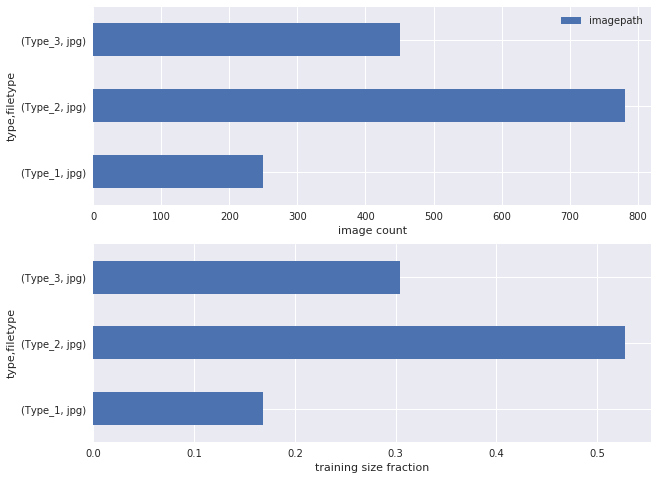

In [9]:
type_aggregation_p = type_aggregation.apply(lambda row: 1.0*row['imagepath']/all_cervix_images.shape[0], axis=1)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel('training size fraction')



./data/train/Type_1/0.jpg
./data/train/Type_2/1.jpg


/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.

./data/train/Type_3/1000.jpg


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



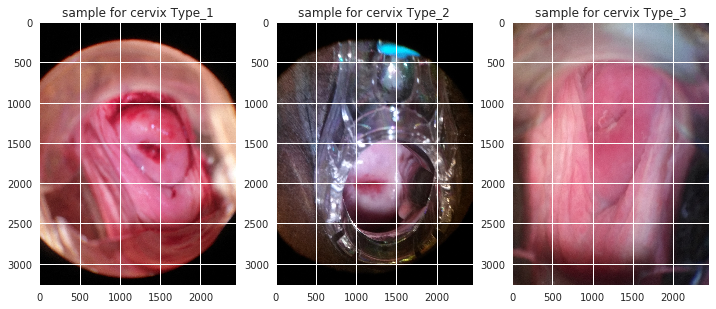

In [10]:
fig = plt.figure(figsize=(12, 8))

i = 1
for t in all_cervix_images['type'].unique():
    ax = fig.add_subplot(1, 3, i)
    i += 1
    f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
    plt.imshow(plt.imread(f))
    print(f)
    plt.title('sample for cervix {}'.format(t))

# Image dimention

In [11]:
from collections import defaultdict

images = defaultdict(list)
for t in all_cervix_images['type'].unique():
    sample_counter = 0
    for _, row in all_cervix_images[all_cervix_images['type'] == t].iterrows():
        try:
            img = imread(row.imagepath)
            sample_counter += 1
            images[t].append(img)
        except:
            print('image read failed for {}'.format(row.imagepath))
        if sample_counter > 35:
            break

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:692: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/home/ubuntu/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.

In [12]:
dfs = []
for t in all_cervix_images['type'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'type': t
        }
    )
    dfs.append(t_)

shapes_df = pd.concat(dfs, axis=0)
shapes_df_grouped = shapes_df.groupby(by=['nchans', 'ncols', 'nrows', 'type']).size()\
.reset_index().sort_values(['type', 0], ascending=False)
shapes_df_grouped

,nchans,ncols,nrows,type,0
3,3,2448,3264,Type_3,28
6,3,3096,4128,Type_3,7
7,3,3264,2448,Type_3,1
5,3,3096,4128,Type_2,18
2,3,2448,3264,Type_2,17
8,3,4128,3096,Type_2,1
1,3,2448,3264,Type_1,18
4,3,3096,4128,Type_1,17
0,3,2322,4128,Type_1,1


In [13]:
images['Type_1'][0].shape

(3264, 2448, 3)

In [14]:
shapes_df_grouped['size_with_type'] = shapes_df_grouped\
.apply(lambda row: '{}-{}-{}'.format(row.ncols, row.nrows, row.type), axis=1)
shapes_df_grouped = shapes_df_grouped.set_index(shapes_df_grouped['size_with_type'].values)


/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



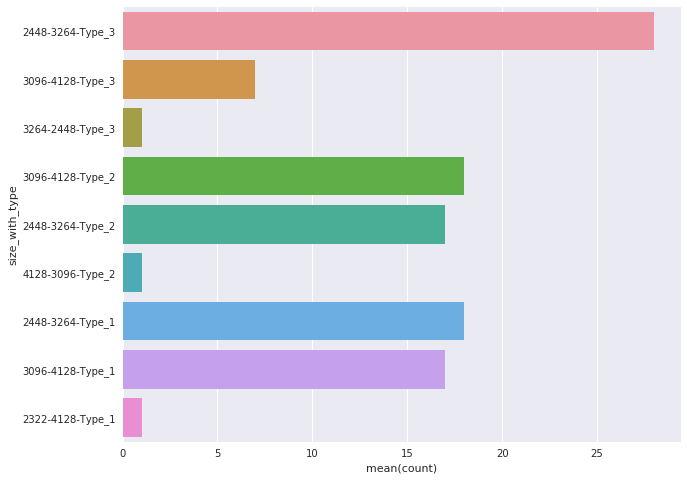

In [15]:
shapes_df_grouped['count'] = shapes_df_grouped[[0]]
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='size_with_type', data=shapes_df_grouped)

# TSNE embedding

In [16]:
def transform_image(img, rescaled_dim, to_gray=False):
    resized = cv2.resize(img, (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR)
    
    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOROR_RGB2GRAY).astype('float')
    else:
        resized = resized.astype('float')
    
    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX)
    timg = normalized.reshape(1, np.prod(normalized.shape))
    
    return timg/np.linalg.norm(timg)

rescaled_dim = 100

all_images =[]
all_image_types = []

for t in all_cervix_images['type'].unique():
    all_images = all_images + images[t]
    all_image_types = all_image_types + len(images[t])*[t]

gray_all_images_as_vecs = [transform_image(img, rescaled_dim) for img in all_images]

gray_imgs_mat = np.array(gray_all_images_as_vecs).squeeze()
all_image_types = np.array(all_image_types)
gray_imgs_mat.shape, all_image_types.shape

((108, 30000), (108,))

In [17]:
images['Type_1']

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ..., 
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ..., 
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ..., 
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ..., 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ..., 
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [0, 0, 0],
         [1, 1, 1],
         ..., 
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 1],
         [0, 0, 0],
         [0, 0, 0],
         ..., 
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[ 13,  13,  15],
         [  9,  10,  12],
         [  8,  14,  12],
         ..., 
         [ 27,  29,  42],
         [ 23,  30,  40],
 

# 3D t-SNE

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(
    n_components=3,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2
).fit_transform(gray_imgs_mat)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 108 / 108
[t-SNE] Mean sigma: 0.222202
[t-SNE] Iteration 25: error = -0.1521238, gradient norm = 0.0008227
[t-SNE] Iteration 25: gradient norm 0.000823. Finished.
[t-SNE] Iteration 50: error = -0.4655532, gradient norm = 0.0004266
[t-SNE] Iteration 50: gradient norm 0.000427. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.465553
[t-SNE] Iteration 75: error = -0.6172170, gradient norm = 0.0003229
[t-SNE] Iteration 75: gradient norm 0.000323. Finished.
[t-SNE] Error after 75 iterations: -0.465553


In [20]:
from sklearn import preprocessing
trace1 = go.Scatter3d(
    x=tsne[:, 0],
    y=tsne[:, 1],
    z=tsne[:, 2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color=preprocessing.LabelEncoder().fit_transform(all_image_types),
        colorscale='Portland',
        colorbar=dict(title='cervix types'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)

data =[trace1]
layout=dict(height=800, width=800, title='3D embedding of images')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



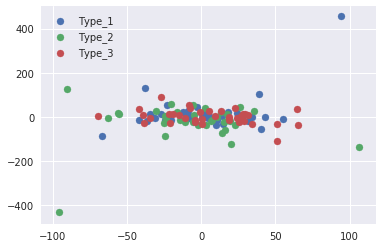

In [21]:
for t in all_cervix_images['type'].unique():
    tsne_t = tsne[np.where(all_image_types == t), :][0]
    plt.scatter(tsne_t[:,0], tsne_t[:, 1])
plt.legend(all_cervix_images['type'].unique())

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



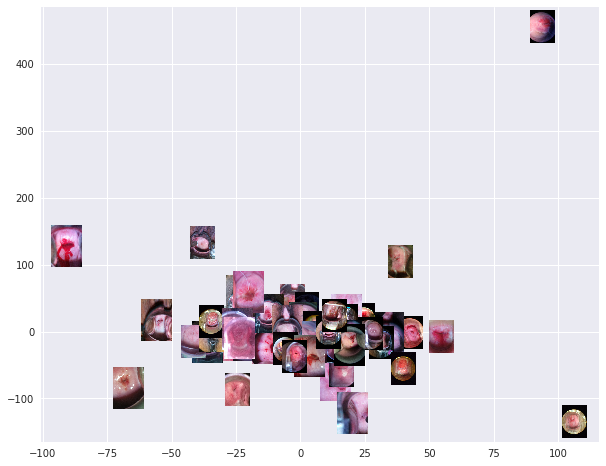

In [22]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, images, ax=None, zoom=0.01):
    ax=plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    
nimgs = 60
plt.figure(figsize=(10,8))
imscatter(tsne[0:nimgs, 0], tsne[0:nimgs, 1], all_images[0:nimgs])

# Clustering of pairwise image distances

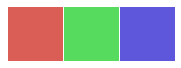

In [23]:
pal = sns.color_palette("hls", 3)
sns.palplot(pal)

In [24]:
from scipy.spatial.distance import pdist, squareform

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



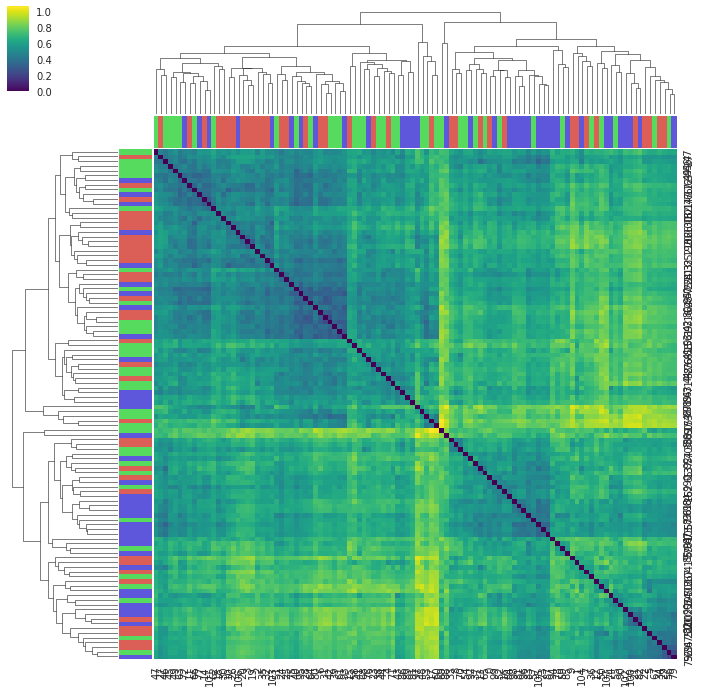

In [25]:
sq_dists = squareform(pdist(gray_imgs_mat))
all_image_types = list(all_image_types)
d = {
    'Type_1': pal[0],
    'Type_2':pal[1],
    'Type_3':pal[2]
}

#translate each sample to its color
colors = list(map(lambda t: d[t], all_image_types))

sns.clustermap(
    sq_dists,
    figsize=(12,12),
    row_colors = colors, col_colors=colors,
    cmap=plt.get_cmap('viridis')
)

In [26]:
gray_imgs_mat

array([[  4.71753673e-05,   4.71753673e-05,   4.71753673e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  8.94379871e-04,   8.94379871e-04,   7.89158710e-04, ...,
          1.57831742e-03,   1.68353858e-03,   2.78836077e-03],
       [  5.81449665e-03,   4.74924535e-03,   2.57435729e-03, ...,
          4.43854706e-05,   4.43854706e-05,   1.33156412e-04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.52957389e-03,   5.19506244e-03,   6.38659052e-03, ...,
          6.05296266e-03,   7.53045748e-03,   7.24449074e-03],
       [  1.02121944e-04,   0.00000000e+00,   1.53182915e-04, ...,
          0.00000000e+00,   5.10609718e-05,   0.00000000e+00]])

### here is the unclustered distance matrix

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



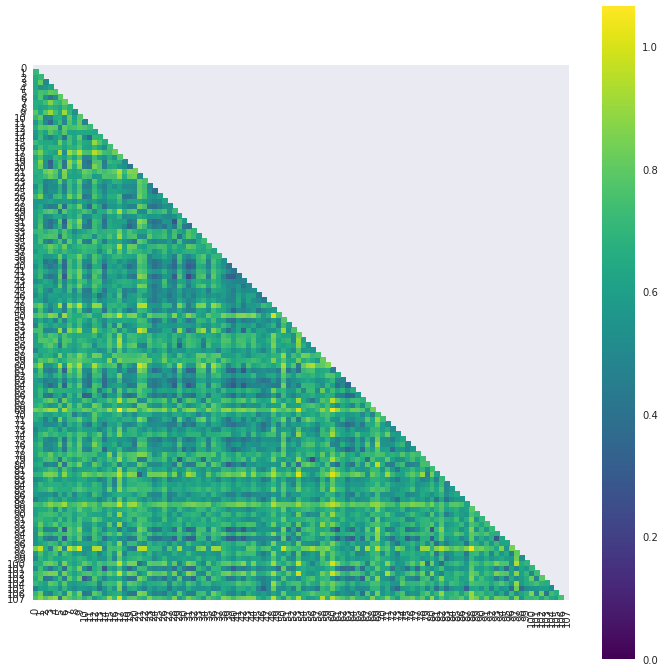

In [27]:
mask = np.zeros_like(sq_dists, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))
sns.heatmap(sq_dists, cmap=plt.get_cmap('viridis'), square=True, mask=mask)

# Image neighbourhood

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning:

Mean of empty slice

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning:

Mean of empty slice



/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



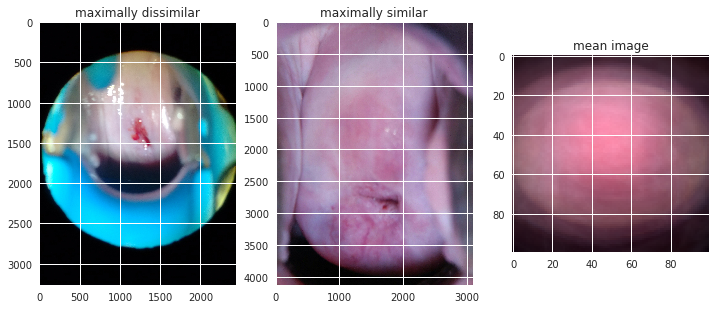

In [28]:
# upper triangle of matrix set to np.nan
sq_dists[np.triu_indices_from(mask)] = np.nan
sq_dists[0, 0] = np.nan

fig = plt.figure(figsize=(12, 8))
#maximally dissimilar image
ax = fig.add_subplot(1,3,1)
maximally_dissimilar_image_idx = np.nanargmax(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_dissimilar_image_idx])
plt.title('maximally dissimilar')

# maximally simliar image
ax = fig.add_subplot(1,3,2)
maximally_similar_image_idx = np.nanargmin(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_similar_image_idx])
plt.title('maximally similar')

#now compute the mean image
ax = fig.add_subplot(1,3,3)
mean_img = gray_imgs_mat.mean(axis=0).reshape(rescaled_dim, rescaled_dim, 3)
plt.imshow(cv2.normalize(mean_img, None, 0.0, 1.0, cv2.NORM_MINMAX))
plt.title('mean image')

# Model Selection

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
y = LabelEncoder().fit_transform(all_image_types).reshape(-1)
X = gray_imgs_mat
X.shape, y.shape

((108, 30000), (108,))

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 30000), (36, 30000), (72,), (36,))

In [31]:
y_train, y_test

(array([0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
        2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0,
        2, 1, 2]),
 array([2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1,
        0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2]))

In [32]:
clf = LogisticRegression()
grid = {
    'C': [1e-9, 1e-6, 1e-3, 1e0],
    'penalty':['l1', 'l2']
}
cv = GridSearchCV(clf, grid, scoring='neg_log_loss', n_jobs=1, verbose=1)
cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    4.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-09, 1e-06, 0.001, 1.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=1)

In [33]:
for i in range(1, len(cv.cv_results_['params']) + 1):
    rank = cv.cv_results_['rank_test_score'][i-1]
    s = cv.cv_results_['mean_test_score'][i-1]
    sd = cv.cv_results_['std_test_score'][i-1]
    params = cv.cv_results_['params'][i-1]
    print("{0}.Mean validation neg log loss: {1:.6f}(std:{2:.6f}) - {3}".format(
            rank,
            s,
            sd,
            params
        ))

5.Mean validation neg log loss: -1.098612(std:0.000000) - {'C': 1e-09, 'penalty': 'l1'}
4.Mean validation neg log loss: -1.098612(std:0.000000) - {'C': 1e-09, 'penalty': 'l2'}
5.Mean validation neg log loss: -1.098612(std:0.000000) - {'C': 1e-06, 'penalty': 'l1'}
3.Mean validation neg log loss: -1.098612(std:0.000000) - {'C': 1e-06, 'penalty': 'l2'}
5.Mean validation neg log loss: -1.098612(std:0.000000) - {'C': 0.001, 'penalty': 'l1'}
2.Mean validation neg log loss: -1.098585(std:0.000032) - {'C': 0.001, 'penalty': 'l2'}
8.Mean validation neg log loss: -1.098710(std:0.000749) - {'C': 1.0, 'penalty': 'l1'}
1.Mean validation neg log loss: -1.091674(std:0.028704) - {'C': 1.0, 'penalty': 'l2'}


In [45]:
y_test_hat_p = cv.predict_proba(X_test)
tmp = y_test_hat_p[:,0]
tmp1 = y_test_hat_p[:,1]
tmp2 = y_test_hat_p[:,2]

TypeError: slice indices must be integers or None or have an __index__ method

/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



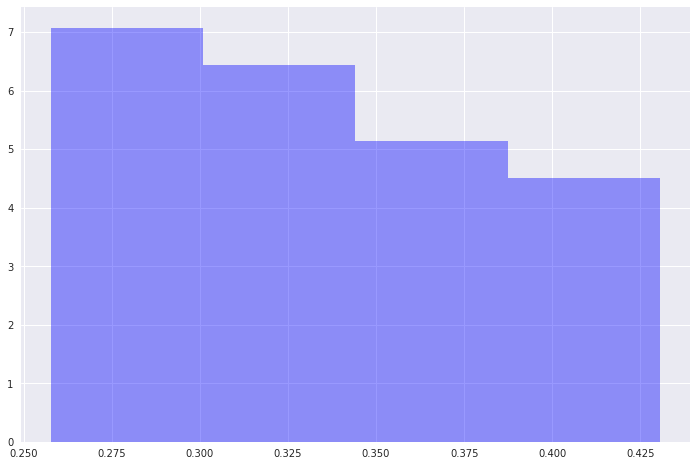

In [47]:
plt.figure(figsize=(12, 8))
# sns.distplot(tmp, color='red')
sns.distplot(tmp1, color='blue')
sns.distplot(tmp2, color='green')

In [49]:
dfy = pd.DataFrame[{'0':y_test_hat_p[:, 0], '1':y_test_hat_p[:1], '2':y_test_hat_p[:, 2]}]
sns.pairplot(dfy)

TypeError: 'type' object is not subscriptable